Training model with 1 hidden layers...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2788 - loss: 2.0270 - val_accuracy: 0.3468 - val_loss: 1.8430
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3813 - loss: 1.7514 - val_accuracy: 0.4020 - val_loss: 1.6777
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4024 - loss: 1.6713 - val_accuracy: 0.4143 - val_loss: 1.6489
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4165 - loss: 1.6395 - val_accuracy: 0.4431 - val_loss: 1.5910
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4343 - loss: 1.5978 - val_accuracy: 0.4264 - val_loss: 1.6097
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4410 - loss: 1.5764 - val_accuracy: 0.4418 - val_loss: 1.5712
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4484 - loss: 1.5532 - val_accuracy: 0.4291 - val_loss: 1.6113
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accu

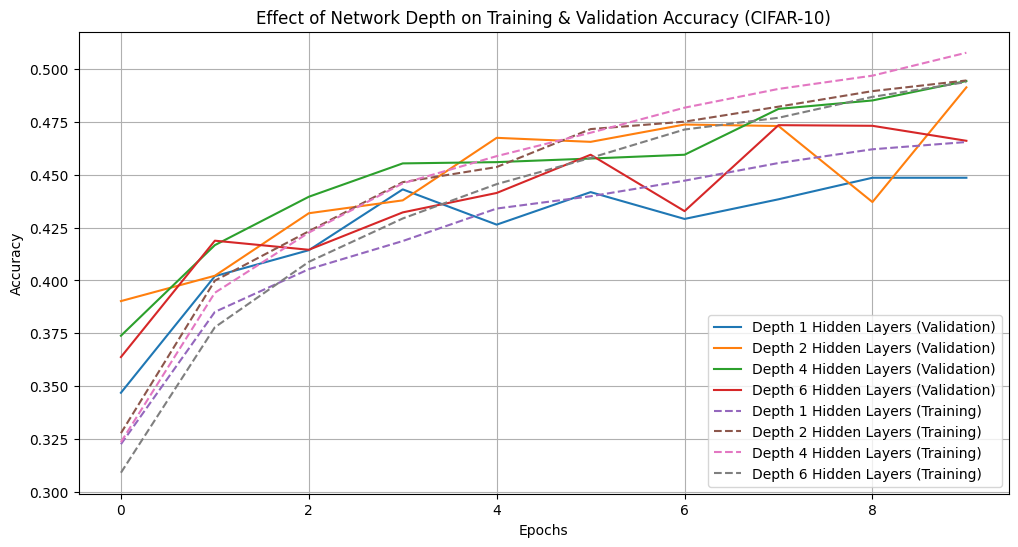

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to create MLP model with different depths
def create_mlp(depth, neurons_per_layer=128):
    model = keras.Sequential()
    # The input shape is now explicitly defined as (32, 32, 3)
    model.add(layers.Input(shape=(32, 32, 3)))
    # Flatten the input within the model using a Flatten layer
    model.add(layers.Flatten())

    for _ in range(depth):  # Adding hidden layers based on depth
        model.add(layers.Dense(neurons_per_layer, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))  # Output layer (10 classes)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different depths
depths = [1, 2, 4, 6]  # Varying the number of hidden layers
history = {}

for depth in depths:
    model = create_mlp(depth)
    print(f"Training model with {depth} hidden layers...")
    history[depth] = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

# Plot training and validation accuracy results
plt.figure(figsize=(12, 6))

# Plot validation accuracy for each model
for depth, hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f"Depth {depth} Hidden Layers (Validation)")

# Plot training accuracy for each model
for depth, hist in history.items():
    plt.plot(hist.history['accuracy'], linestyle='--', label=f"Depth {depth} Hidden Layers (Training)")

# Customize the plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Network Depth on Training & Validation Accuracy (CIFAR-10)')
plt.grid(True)
plt.show()